In [ ]:
#pip install python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from binance.client import Client
from binance import BinanceSocketManager

In [ ]:
client = Client()
bsm = BinanceSocketManager(client)

In [ ]:
socket = bsm.kline_socket('BTCUSDT')
await socket.__aenter__()
msg = await socket.recv()
print(msg)
await socket.__aexit__(None,None,None)

{'e': 'kline', 'E': 1719171257388, 's': 'BTCUSDT', 'k': {'t': 1719171240000, 'T': 1719171299999, 's': 'BTCUSDT', 'i': '1m', 'f': 3647156565, 'L': 3647156691, 'o': '64112.02000000', 'c': '64112.01000000', 'h': '64112.02000000', 'l': '64112.01000000', 'v': '0.18625000', 'n': 127, 'x': False, 'q': '11940.86244630', 'V': '0.05838000', 'Q': '3742.85972760', 'B': '0'}}


In [ ]:
def datatransfo(msg):
  df = pd.DataFrame({'Time':msg['E'], 'Price':msg['k']['c']}, index = [0])
  df.Price = df.Price.astype(float)
  df.Time = pd.to_datetime(df.Time, unit='ms')
  return df

In [ ]:
datatransfo(msg)

,Time,Price
0,2024-06-23 19:34:17.388,64112.01


In [ ]:
engine = create_engine('sqlite:///BTCUSDTstream.db')

In [ ]:
current_event = pd.Series(pd.to_datetime(0))
while True:
  await socket.__aenter__()
  msg = await socket.recv()
  df = datatransfo(msg)
  if df.Time.values > current_event.values:
    current_event = df.Time
    df.to_sql('BTCUSDT', engine, if_exists='append', index=False)

CancelledError: 

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [ ]:
engine = create_engine('sqlite:///BTCUSDTstream.db')

In [ ]:
df_ = pd.read_sql('BTCUSDT', engine)

<Axes: xlabel='Time'>

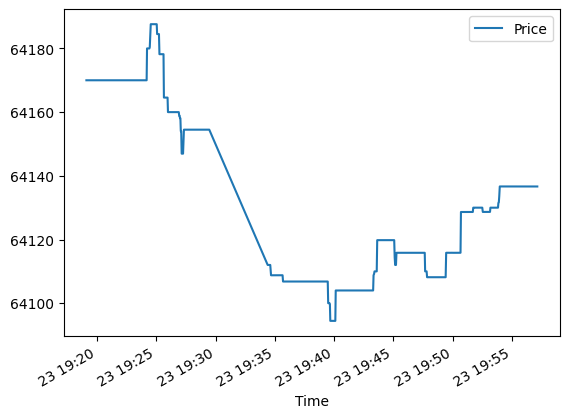

In [ ]:
df_.set_index('Time').plot()

In [ ]:
df_

,Time,Price
0,2024-06-23 19:19:06.081,64170.00
1,2024-06-23 19:19:08.115,64170.00
2,2024-06-23 19:19:10.350,64169.99
3,2024-06-23 19:19:12.886,64170.00
4,2024-06-23 19:19:14.914,64169.99
...,...,...
859,2024-06-23 19:57:00.009,64136.66
860,2024-06-23 19:57:02.074,64136.66
861,2024-06-23 19:57:04.390,64136.65
862,2024-06-23 19:57:06.407,64136.65


TypeError: cannot unpack non-iterable Axes object

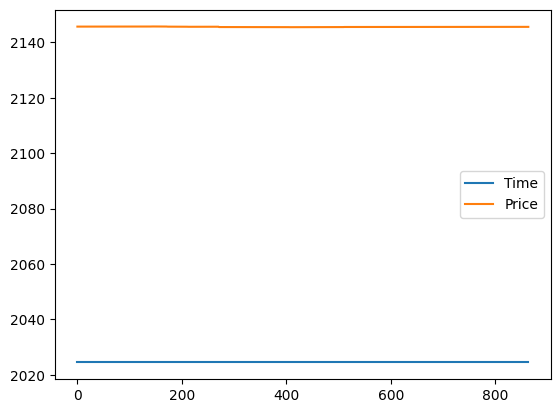

In [ ]:
fig, ax = df_.plot()
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # Ajusta as margens
plt.show()